In [2]:
from astropy.io import fits
import numpy as np
import os, sys
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import pandas as pd
import pickle as pkl

In [3]:
cutoutdir = "../newdata/cutouts/"
files = os.listdir(cutoutdir)
files

['S2CLS_COSMOS_NMF_DR1_new_header.cutout.signal.fits',
 '.DS_Store',
 'cosmos-uvista-hipe12_itermap_10_iterations_6.0_arcsec_pixels_PMW.noise.cutout.fits',
 'COSMOS_PACS100_20160805_img_avg_noise.fits',
 'COSMOS_PACS160_20160728_img_avg_noise.fits',
 'COSMOS_PACS160_20160728_img_avg.fits',
 'cosmos-uvista-hipe12_itermap_10_iterations_6.0_arcsec_pixels_PSW.noise.cutout.fits',
 'S2CLS_COSMOS_NMF_DR1_new_header.cutout.noise.fits',
 'cosmos-uvista-hipe12_itermap_10_iterations_6.0_arcsec_pixels_PSW.signal.cutout.fits',
 'COSMOS_PACS100_20160805_img_avg.fits',
 'cosmos-uvista-hipe12_itermap_10_iterations_6.0_arcsec_pixels_PMW.signal.cutout.fits',
 'cosmos-uvista-hipe12_itermap_10_iterations_6.0_arcsec_pixels_PLW.signal.cutout.fits',
 'cosmos-uvista-hipe12_itermap_10_iterations_6.0_arcsec_pixels_PLW.noise.cutout.fits',
 'mips_24_GO3_sci_10.cutout.fits',
 'mips_24_GO3_unc_10.cutout.fits']

In [4]:
files[0], files[5]

('S2CLS_COSMOS_NMF_DR1_new_header.cutout.signal.fits',
 'COSMOS_PACS160_20160728_img_avg.fits')

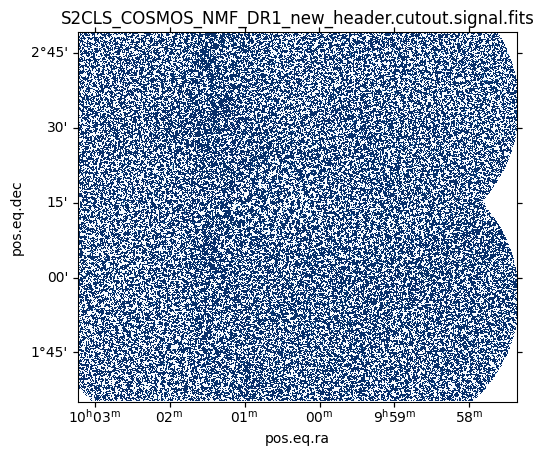

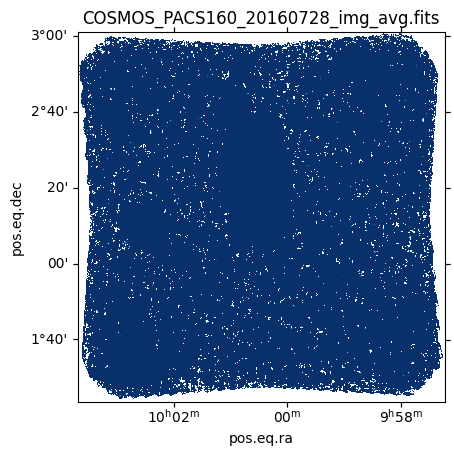

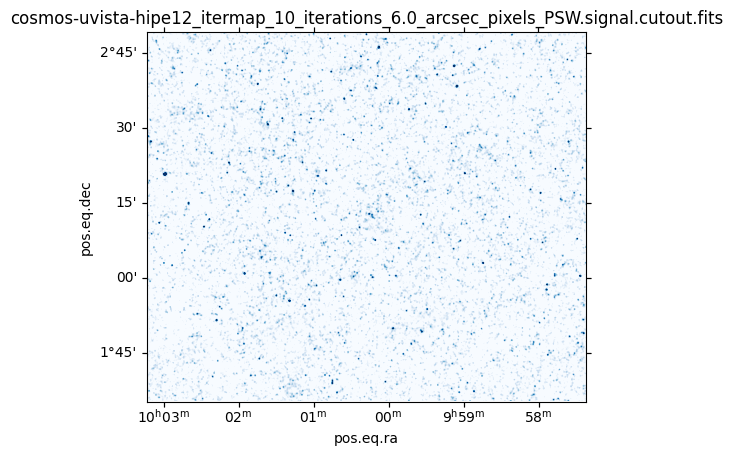

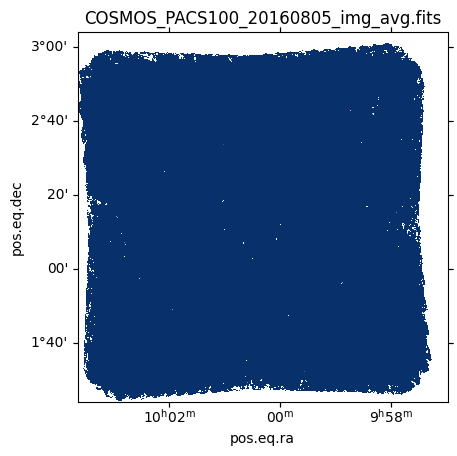

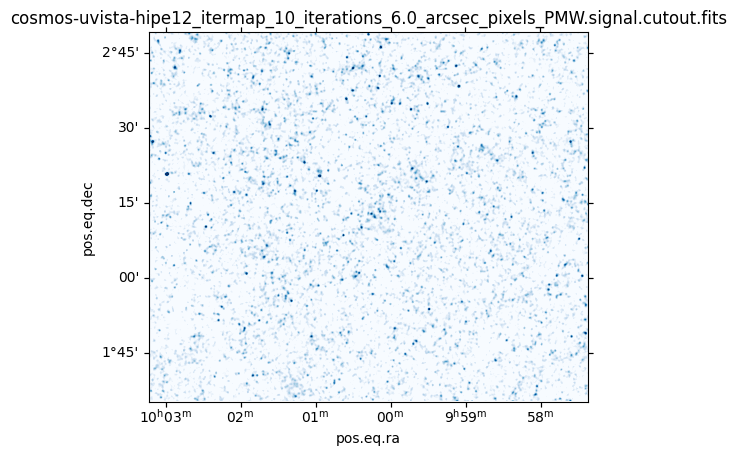

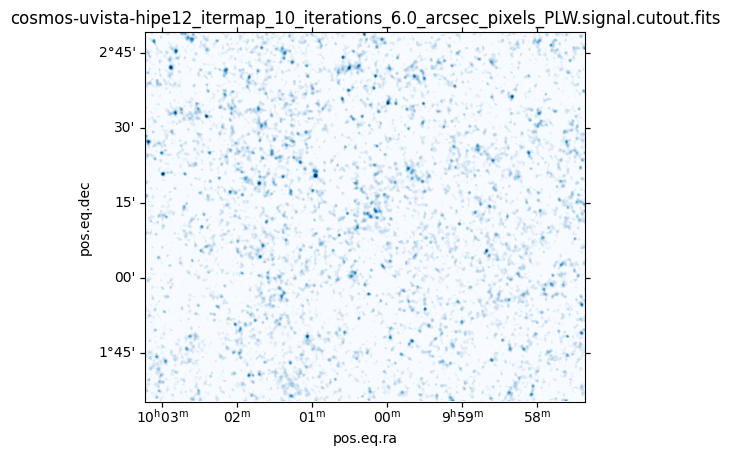

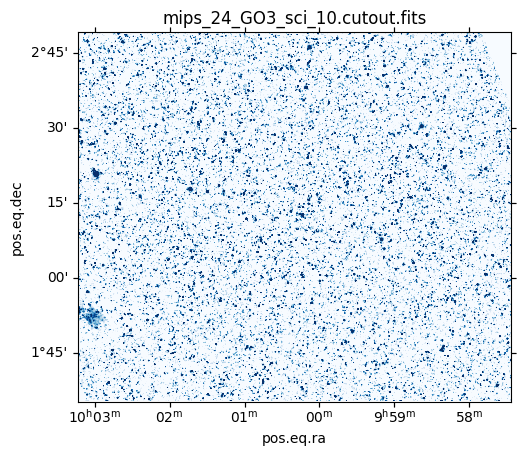

In [5]:
for file in files:
    if "noise" in file or "unc" in file:
        continue
    if "DS_Store" in file:
        continue
    with fits.open(cutoutdir+file) as hdul:
        if len(hdul) > 1:
            data = hdul[1].data
            wcs = WCS(hdul[1].header)
        else:
            data = hdul[0].data
            wcs = WCS(hdul[0].header)
    plt.subplot(projection=wcs)
    plt.title(file)
    plt.imshow(data, cmap='Blues', alpha=1, vmin=0, vmax=0.05)
    plt.show()
    plt.close()

In [6]:
catalog = pd.read_csv("../newdata/cosmos2020_FARMER.csv")
catalog

,ALPHA_J2000,DELTA_J2000,lp_zBEST,lp_mass_med,ez_restU-V,ez_restV-J,restNUV-R,restR-J,lp_SFR_best,lp_sSFR_med,lp_type
0,150.477592,2.328928,1.5930,8.57070,0.604582,-0.197400,0.91571,-0.45688,0.2347,-8.35894,0
1,150.477978,2.329170,0.1151,5.51014,0.081209,-0.203710,0.61624,0.05139,-2.4560,-8.27277,0
2,150.477024,2.329483,0.2211,7.71550,0.283352,0.016571,0.77388,-0.02733,-1.0380,-8.69058,0
3,150.474793,2.332136,2.8698,8.08458,0.326889,-0.820299,0.62810,-1.13150,0.4251,-7.65374,0
4,150.474627,2.332484,1.5139,8.00612,0.039471,1.015029,1.17316,-0.11858,-1.1460,-8.53360,0
...,...,...,...,...,...,...,...,...,...,...,...
711880,150.212106,1.787928,0.3207,7.49669,NaN,NaN,1.24270,-0.08177,-1.7330,-8.97360,0
711881,150.211415,1.788014,0.0490,6.65096,NaN,NaN,6.23957,1.09682,-5.9900,-12.76579,0
711882,150.212666,1.788418,0.8165,7.61975,NaN,NaN,0.84868,-0.24417,-0.7851,-8.43227,0
711883,150.212557,1.789332,0.0812,5.16792,NaN,NaN,0.90254,-1.10197,-2.1850,-7.30000,0


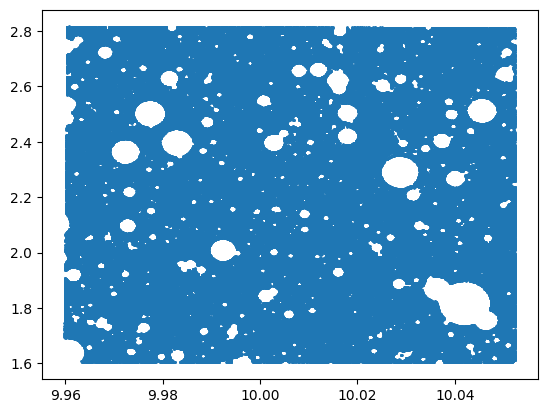

In [7]:
plt.figure()
plt.scatter(catalog["ALPHA_J2000"] / 15, catalog["DELTA_J2000"], s=1)
plt.show()
plt.close()

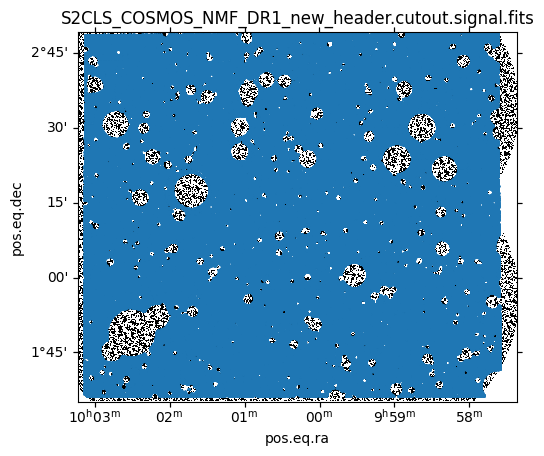

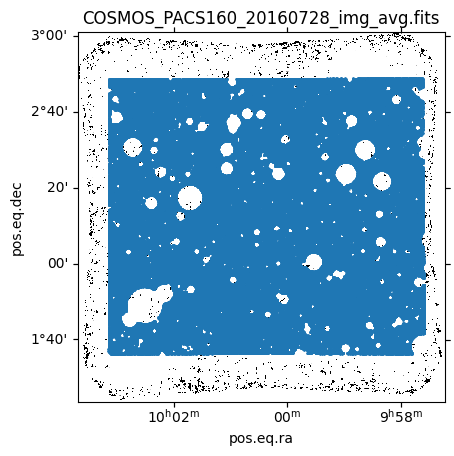

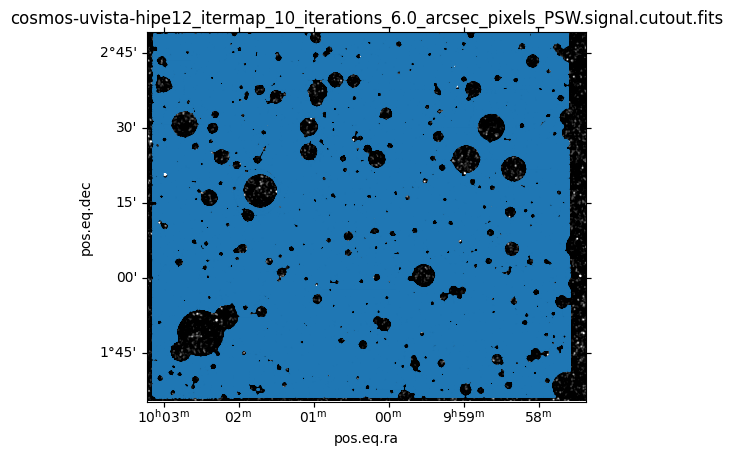

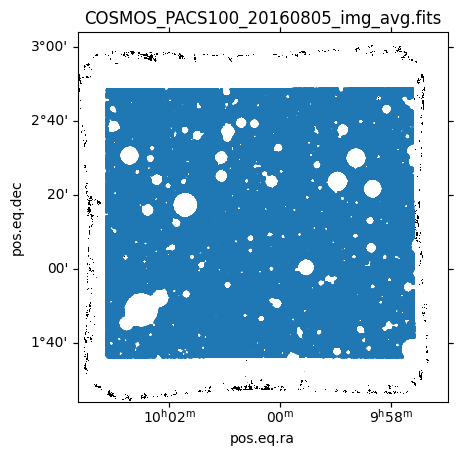

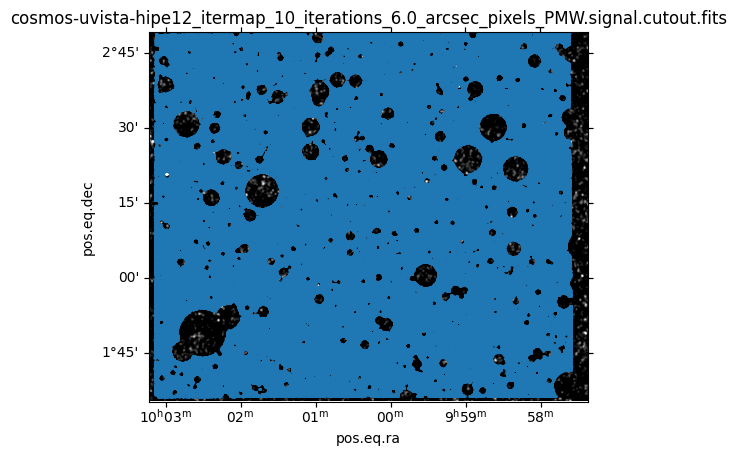

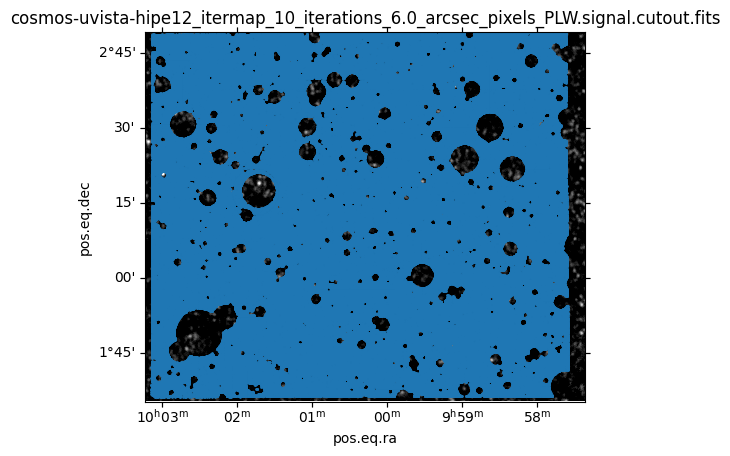

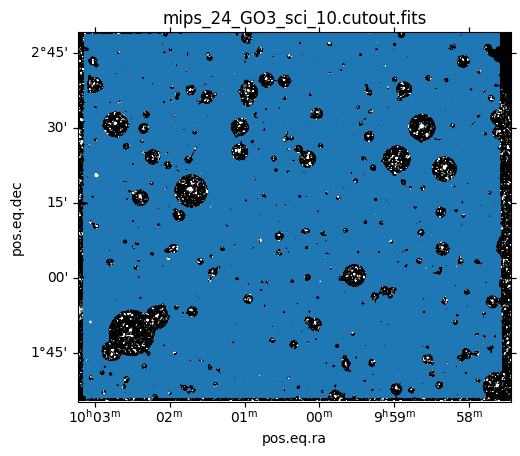

In [8]:
for file in files:
    if "noise" in file or "unc" in file:
        continue
    if "DS_Store" in file:
        continue
    with fits.open(cutoutdir+file) as hdul:
        if len(hdul) > 1:
            data = hdul[1].data
            wcs = WCS(hdul[1].header)
        else:
            data = hdul[0].data
            wcs = WCS(hdul[0].header)
    plt.subplot(projection=wcs)
    plt.title(file)
    plt.scatter(catalog["ALPHA_J2000"], catalog["DELTA_J2000"], s=1, transform=plt.gca().get_transform('world'))
    plt.imshow(data, cmap='gray', alpha=1, vmin=0, vmax=0.05)
    plt.show()
    plt.close()

In [9]:
catalog

,ALPHA_J2000,DELTA_J2000,lp_zBEST,lp_mass_med,ez_restU-V,ez_restV-J,restNUV-R,restR-J,lp_SFR_best,lp_sSFR_med,lp_type
0,150.477592,2.328928,1.5930,8.57070,0.604582,-0.197400,0.91571,-0.45688,0.2347,-8.35894,0
1,150.477978,2.329170,0.1151,5.51014,0.081209,-0.203710,0.61624,0.05139,-2.4560,-8.27277,0
2,150.477024,2.329483,0.2211,7.71550,0.283352,0.016571,0.77388,-0.02733,-1.0380,-8.69058,0
3,150.474793,2.332136,2.8698,8.08458,0.326889,-0.820299,0.62810,-1.13150,0.4251,-7.65374,0
4,150.474627,2.332484,1.5139,8.00612,0.039471,1.015029,1.17316,-0.11858,-1.1460,-8.53360,0
...,...,...,...,...,...,...,...,...,...,...,...
711880,150.212106,1.787928,0.3207,7.49669,NaN,NaN,1.24270,-0.08177,-1.7330,-8.97360,0
711881,150.211415,1.788014,0.0490,6.65096,NaN,NaN,6.23957,1.09682,-5.9900,-12.76579,0
711882,150.212666,1.788418,0.8165,7.61975,NaN,NaN,0.84868,-0.24417,-0.7851,-8.43227,0
711883,150.212557,1.789332,0.0812,5.16792,NaN,NaN,0.90254,-1.10197,-2.1850,-7.30000,0


In [10]:
with open("./simstack.pkl", "rb") as f:
    simstack = pkl.load(f)
    
simstack.keys()

dict_keys(['wvs', 'seds', 'stds', 'ngals', 'z_med', 'boot', 'cov', 'm_med', 'nd', 'beams'])

In [11]:
simstack["ngals"]

{'z=0.01_0.5__logM=9.5_10.0__SF?=0': 489,
 'z=0.01_0.5__logM=9.5_10.0__SF?=1': 1877,
 'z=0.01_0.5__logM=10.0_10.5__SF?=0': 503,
 'z=0.01_0.5__logM=10.0_10.5__SF?=1': 1110,
 'z=0.01_0.5__logM=10.5_11.0__SF?=0': 470,
 'z=0.01_0.5__logM=10.5_11.0__SF?=1': 540,
 'z=0.01_0.5__logM=11.0_12.0__SF?=0': 156,
 'z=0.01_0.5__logM=11.0_12.0__SF?=1': 88,
 'z=0.5_1.0__logM=9.5_10.0__SF?=0': 1297,
 'z=0.5_1.0__logM=9.5_10.0__SF?=1': 9164,
 'z=0.5_1.0__logM=10.0_10.5__SF?=0': 2132,
 'z=0.5_1.0__logM=10.0_10.5__SF?=1': 5073,
 'z=0.5_1.0__logM=10.5_11.0__SF?=0': 1948,
 'z=0.5_1.0__logM=10.5_11.0__SF?=1': 2737,
 'z=0.5_1.0__logM=11.0_12.0__SF?=0': 670,
 'z=0.5_1.0__logM=11.0_12.0__SF?=1': 538,
 'z=1.0_1.5__logM=9.5_10.0__SF?=0': 618,
 'z=1.0_1.5__logM=9.5_10.0__SF?=1': 11553,
 'z=1.0_1.5__logM=10.0_10.5__SF?=0': 1563,
 'z=1.0_1.5__logM=10.0_10.5__SF?=1': 6374,
 'z=1.0_1.5__logM=10.5_11.0__SF?=0': 1763,
 'z=1.0_1.5__logM=10.5_11.0__SF?=1': 3163,
 'z=1.0_1.5__logM=11.0_12.0__SF?=0': 527,
 'z=1.0_1.5__logM=1

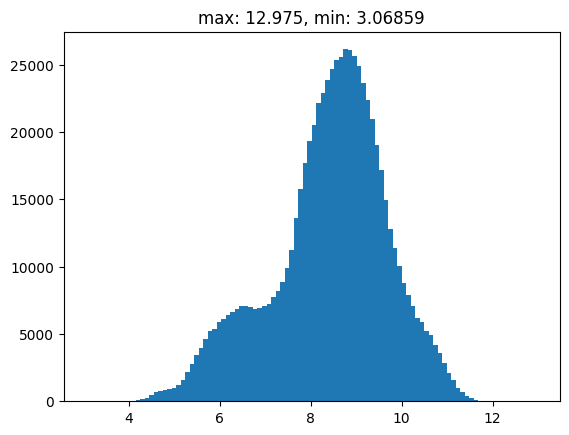

In [12]:
plt.figure()
plt.hist(catalog["lp_mass_med"], bins=100)
plt.title(f"max: {max(catalog['lp_mass_med'])}, min: {min(catalog['lp_mass_med'])}")
plt.show()
plt.close()

In [13]:
np.sum(np.array(catalog["lp_mass_med"] > 9.5) * np.array(catalog["lp_mass_med"] < 12) * np.array(catalog["lp_zBEST"] >= 0.01))

128872

In [14]:
np.sum(np.array(catalog["lp_zBEST"] >= 0.01))

704482

In [15]:
nosf, yessf = 0, 0
for key, val in simstack["ngals"].items():
    if "SF?=1" in key:
        yessf += val
    else:
        nosf += val
nosf, yessf, nosf+yessf

(17596, 111277, 128873)

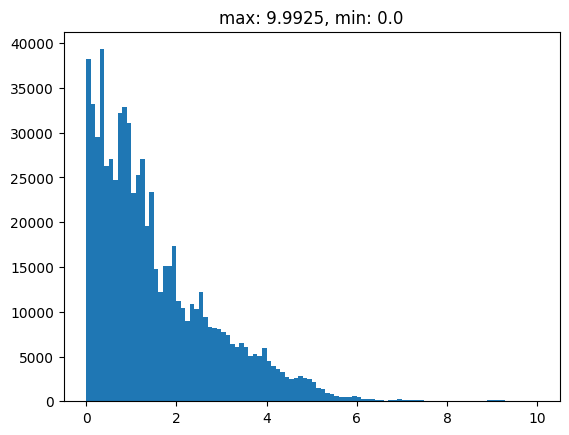

In [16]:
plt.figure()
plt.hist(catalog["lp_zBEST"], bins=100)
plt.title(f"max: {max(catalog['lp_zBEST'])}, min: {min(catalog['lp_zBEST'])}")
plt.show()
plt.close()

In [17]:
np.sum(np.array(catalog["lp_mass_med"] <= 10) * np.array(catalog["lp_mass_med"] > 9.5) \
    * np.array(catalog["lp_zBEST"] < 0.5) * np.array(catalog["lp_zBEST"] >= 0.01))

2365

In [18]:
1877+489

2366

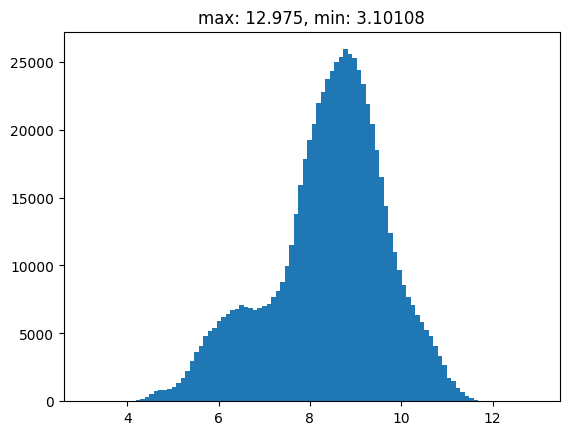

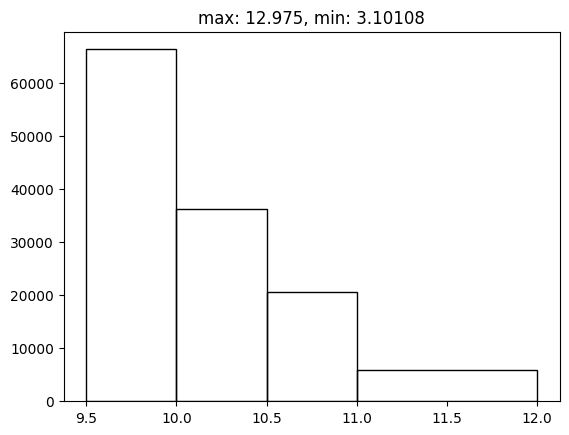

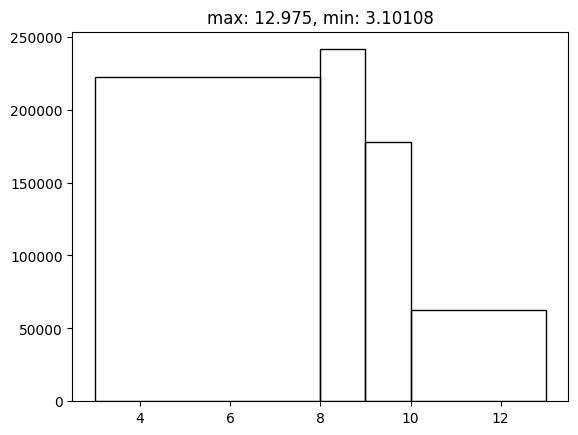

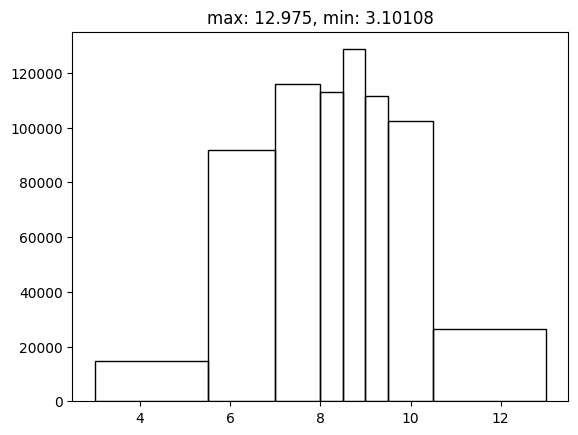

In [30]:
what_to_use = catalog[catalog["lp_zBEST"] >= 0.01]

plt.figure()
plt.hist(what_to_use["lp_mass_med"], bins=100)
plt.title(f"max: {max(what_to_use['lp_mass_med'])}, min: {min(what_to_use['lp_mass_med'])}")
plt.show()
plt.close()

plt.figure()
plt.hist(what_to_use["lp_mass_med"], bins=[9.5, 10, 10.5, 11, 12], fill=False)
plt.title(f"max: {max(what_to_use['lp_mass_med'])}, min: {min(what_to_use['lp_mass_med'])}")
plt.show()
plt.close()

plt.figure()
plt.hist(what_to_use["lp_mass_med"], bins=[3, 8, 9, 10, 13], fill=False)
plt.title(f"max: {max(what_to_use['lp_mass_med'])}, min: {min(what_to_use['lp_mass_med'])}")
plt.show()
plt.close()

plt.figure()
plt.hist(what_to_use["lp_mass_med"], bins=[3, 5.5, 7, 8, 8.5, 9, 9.5, 10.5, 13], fill=False)
plt.title(f"max: {max(what_to_use['lp_mass_med'])}, min: {min(what_to_use['lp_mass_med'])}")
plt.show()
plt.close()

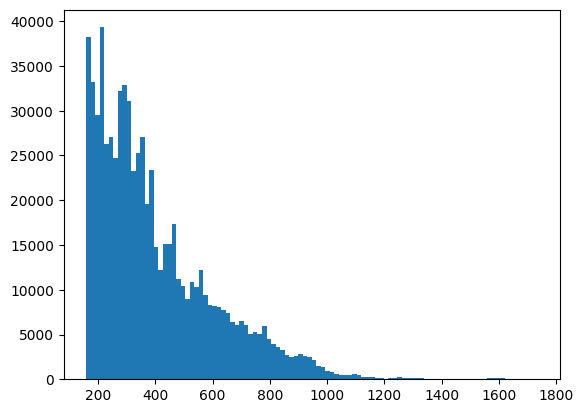

In [21]:
plt.figure()
plt.hist(157.74 * (catalog["lp_zBEST"] + 1), bins=100)
plt.show()
plt.close()